<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Pre-Processing-&amp;-Training-Data-Development" data-toc-modified-id="Pre-Processing-&amp;-Training-Data-Development-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Pre-Processing &amp; Training Data Development<a id="4_Preprocessing_Training_DataDevelopment"></a></a></span><ul class="toc-item"><li><span><a href="#Importing-Packages-and-Libraries" data-toc-modified-id="Importing-Packages-and-Libraries-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Importing Packages and Libraries<a id="4.1_Imports"></a></a></span></li><li><span><a href="#Loading-Data-Set" data-toc-modified-id="Loading-Data-Set-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Loading Data Set<a id="4.2_Loading_Data"></a></a></span></li><li><span><a href="#Checking-Correlations" data-toc-modified-id="Checking-Correlations-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Checking Correlations<a id="4.3_Checking_Correlations"></a></a></span></li><li><span><a href="#Defining-Target-and-Predictors" data-toc-modified-id="Defining-Target-and-Predictors-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Defining Target and Predictors<a id="4.4_Defining_Target_Predictors"></a></a></span></li><li><span><a href="#Features-Selection" data-toc-modified-id="Features-Selection-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Features Selection<a id="4.5_Features_Selection"></a></a></span></li><li><span><a href="#Summary-of-Pre-Processing-&amp;-Training-Data-Development-Steps" data-toc-modified-id="Summary-of-Pre-Processing-&amp;-Training-Data-Development-Steps-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Summary of Pre-Processing &amp; Training Data Development Steps<a id="4.6_Preprocessing_Summary"></a></a></span></li><li><span><a href="#Overview-of-Execution-Steps-for-the-Next-Phase" data-toc-modified-id="Overview-of-Execution-Steps-for-the-Next-Phase-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Overview of Execution Steps for the Next Phase<a id="4.7_Execution_Steps"></a></a></span></li><li><span><a href="#Quick-Access-to-various-Jupyter-Notebooks" data-toc-modified-id="Quick-Access-to-various-Jupyter-Notebooks-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>Quick Access to various Jupyter Notebooks<a id="4.8_Jupyter_Notebooks"></a></a></span></li></ul></li></ul></div>

# Pre-Processing & Training Data Development<a id='4_Preprocessing_Training_DataDevelopment'></a>

The focus of this notebook is on the pre-processing and training data development and the following steps will be done:

- **Data loading** - Data from the previous EDA phase will be loaded for this phase
- **Checking correlations** - Correlations will be checked out
- **Target and Predictors Selection** - Target feature will be selected and the balance features will be part of the predictors
- **Features selection** - This is the most important step where a list of final features will be selected based on the Lasso regression model

The list of final features will be saved for the machine learning models. This phase is focused on making data ready for the machine learning steps as shown below:

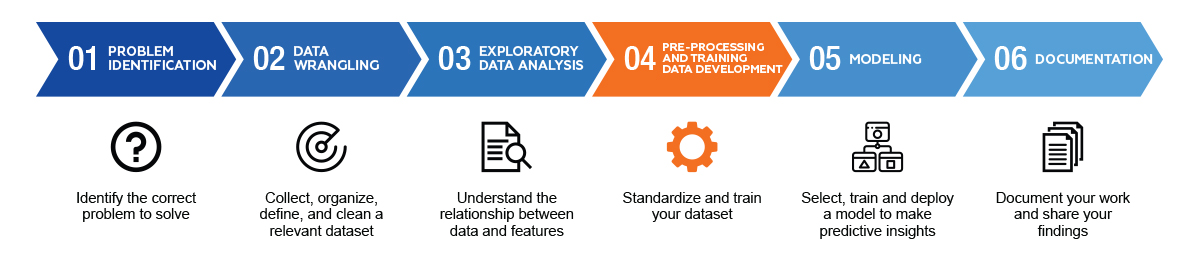

## Importing Packages and Libraries<a id='4.1_Imports'></a>

In [1]:
# Importing required packages and libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# for model building to select features
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# to visualise all the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

import warnings
warnings.simplefilter(action='ignore')

## Loading Data Set<a id='4.2_Loading_Data'></a>

In [2]:
# Loading the X_train and X_test CSV files from the data folder
X_train = pd.read_csv('../HousePricesPrediction/data/xtrain.csv')
X_test = pd.read_csv('../HousePricesPrediction/data/xtest.csv')

X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
0,6.836259,0.000000,0.75,0.461171,0.377048,1.0,1.0,0.333333,1.000000,1.0,0.0,0.0,0.863636,0.4,1.0,0.75,0.6,0.903090,0.732487,0.014706,0.049180,0.0,0.0,1.0,1.0,0.000000,0.00000,0.666667,1.0,1.0,0.75,0.75,0.75,1.000000,0.002835,0.666667,0.0,0.673479,0.239935,1.0,1.00,1.0,1.0,0.559760,0.0,0.0,0.523250,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.643793,1.0,0.000000,0.2,0.8,0.018692,1.000000,0.75,0.430183,0.666667,1.0,1.0,0.116686,0.032907,0.0,0.000000,0.0,0.0,0.0,0.75,1.0,0.0,0.783092,0.750187,0.666667,0.75,12.211060,0.0,0.0,0.0
1,6.487684,0.000000,0.75,0.456066,0.399443,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.363636,0.4,1.0,0.75,0.6,0.698970,0.885622,0.360294,0.049180,0.0,0.0,0.6,0.6,0.666667,0.03375,0.666667,1.0,0.5,0.50,0.75,0.25,0.666667,0.142807,0.666667,0.0,0.114724,0.172340,1.0,1.00,1.0,1.0,0.434539,0.0,0.0,0.406196,0.333333,0.0,0.333333,0.5,0.375,0.333333,0.666667,0.470880,1.0,0.000000,0.2,0.8,0.457944,0.666667,0.25,0.220028,0.666667,1.0,1.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.50,1.0,0.0,0.836829,0.500249,0.666667,0.75,11.887931,0.0,0.0,0.0
2,3.828641,0.795881,0.75,0.394699,0.347082,1.0,1.0,0.000000,0.333333,1.0,0.0,0.0,0.954545,0.4,1.0,1.00,0.6,0.954243,0.732487,0.036765,0.098361,1.0,0.0,0.3,0.2,0.666667,0.25750,1.000000,1.0,1.0,1.00,0.75,0.25,1.000000,0.080794,0.666667,0.0,0.601951,0.286743,1.0,1.00,1.0,1.0,0.627205,0.0,0.0,0.586296,0.333333,0.0,0.666667,0.0,0.250,0.333333,1.000000,0.564575,1.0,0.333333,0.8,0.8,0.046729,0.666667,0.50,0.406206,0.666667,1.0,1.0,0.228705,0.149909,0.0,0.000000,0.0,0.0,0.0,0.75,1.0,0.0,0.278943,1.000000,0.666667,0.75,12.675764,0.0,0.0,0.0
3,7.207119,0.000000,0.75,0.388581,0.493677,1.0,1.0,0.666667,0.666667,1.0,0.0,0.0,0.454545,0.4,1.0,0.75,0.6,0.845098,0.732487,0.066176,0.163934,0.0,0.0,1.0,1.0,0.000000,0.00000,0.666667,1.0,1.0,0.75,0.75,1.00,1.000000,0.255670,0.666667,0.0,0.018114,0.242553,1.0,1.00,1.0,1.0,0.566920,0.0,0.0,0.529943,0.333333,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.470880,1.0,0.333333,0.4,0.8,0.084112,0.666667,0.50,0.362482,0.666667,1.0,1.0,0.469078,0.045704,0.0,0.000000,0.0,0.0,0.0,0.75,1.0,0.0,0.836829,0.250187,0.666667,0.75,12.278393,1.0,0.0,0.0
4,4.025352,0.000000,0.75,0.577658,0.402702,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.363636,0.4,1.0,0.75,0.6,0.778151,0.732487,0.323529,0.737705,0.0,0.0,0.6,0.7,0.666667,0.17000,0.333333,1.0,0.5,0.50,0.75,0.25,0.333333,0.086818,0.666667,0.0,0.434278,0.233224,1.0,0.75,1.0,1.0,0.549026,0.0,0.0,0.513216,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.333333,0.643793,1.0,0.333333,0.8,0.8,0.411215,0.666667,0.50,0.406206,0.666667,1.0,1.0,0.000000,0.000000,0.0,0.801181,0.0,0.0,0.0,0.75,1.0,0.0,0.783092,0.500249,0.666667,0.75,12.103486,0.0,0.0,0.0


In [3]:
# Checking data again to see if everything is integer now
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314 entries, 0 to 1313
Data columns (total 84 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              1314 non-null   float64
 1   MSSubClass      1314 non-null   float64
 2   MSZoning        1314 non-null   float64
 3   LotFrontage     1314 non-null   float64
 4   LotArea         1314 non-null   float64
 5   Street          1314 non-null   float64
 6   Alley           1314 non-null   float64
 7   LotShape        1314 non-null   float64
 8   LandContour     1314 non-null   float64
 9   Utilities       1314 non-null   float64
 10  LotConfig       1314 non-null   float64
 11  LandSlope       1314 non-null   float64
 12  Neighborhood    1314 non-null   float64
 13  Condition1      1314 non-null   float64
 14  Condition2      1314 non-null   float64
 15  BldgType        1314 non-null   float64
 16  HouseStyle      1314 non-null   float64
 17  OverallQual     1314 non-null   f

## Checking Correlations<a id='4.3_Checking_Correlations'></a>

In [4]:
# Checking correlations
X_train.corr()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
Id,1.000000,0.035935,0.039426,-0.016011,-0.011624,-0.017975,0.004232,-0.030461,0.021622,-0.015503,-0.045902,0.041245,0.006023,-0.011182,0.045701,-0.000186,-0.012062,-0.013943,0.012577,0.011197,0.015181,0.045431,-0.004938,-0.004338,-0.011288,-0.013084,-0.039238,0.014617,0.023492,-0.002340,-0.027185,0.015190,0.029138,-0.011672,-0.009293,0.009501,0.011794,0.002610,-0.002884,-0.036506,-0.020154,0.008747,0.053466,0.016837,0.005860,-0.049034,0.011224,0.002138,-0.026726,-0.004610,0.022014,0.043074,-0.019304,0.031263,0.019234,-0.032089,-0.008537,0.010826,0.009288,0.010342,0.025676,-0.006516,0.006512,0.010035,-0.004648,0.003711,-0.017655,-0.000901,-0.010445,-0.032352,0.018066,0.035207,0.033550,-0.003032,0.033747,-0.000048,0.034827,-0.001180,-0.004849,0.020755,-0.006886,0.019624,0.024597,-0.004082
MSSubClass,0.035935,1.000000,-0.216252,-0.402560,-0.377494,-0.003035,-0.117224,-0.079496,-0.028740,0.031311,-0.060314,-0.035160,-0.009111,-0.038455,-0.040371,-0.192555,0.238647,0.090629,-0.039833,0.005793,-0.047038,-0.181738,-0.019759,-0.006696,-0.025584,-0.002809,0.035511,0.040708,-0.031512,0.061590,0.058444,-0.008170,0.029513,0.149138,-0.128393,0.046787,-0.089479,-0.120243,-0.286738,-0.059026,-0.004318,-0.115638,0.008025,-0.317157,0.487079,0.071442,0.203997,-0.053111,0.013345,0.190775,0.289383,0.075439,0.261703,0.005170,0.132407,-0.013875,-0.001301,0.010595,-0.075233,-0.073496,-0.008555,-0.016154,-0.083974,-0.048322,-0.068162,-0.067837,-0.003609,0.029393,0.033469,-0.047094,-0.012912,0.022632,0.024176,0.116109,0.023102,-0.013317,0.034729,-0.021744,-0.019486,-0.052975,-0.019033,-0.010525,-0.023925,0.062237
MSZoning,0.039426,-0.216252,1.000000,0.309330,0.334740,0.070270,0.220573,0.190665,0.046751,-0.010136,0.072783,0.012585,0.515240,0.126270,0.081431,0.064279,0.189795,0.271874,-0.093570,-0.460490,-0.251811,0.050424,0.037185,0.204701,0.210706,0.164331,0.126352,0.271526,0.152245,0.287636,0.247486,0.095680,0.105773,0.055376,0.175883,-0.054600,0.058681,0.036198,0.241478,0.099273,0.202444,0.255430,0.186416,0.274464,-0.019744,-0.111771,0.181750,0.138240,0.019903,0.258207,0.171005,0.096674,-0.123568,0.249519,0.141854,0.072573,0.170651,0.172251,0.344576,-0.260254,0.292510,0.261978,0.260863,0.176682,0.193489,0.297550,0.125348,0.081124,-0.242342,0.030520,0.030151,0.024583,0.024876,0.044207,0.015575,0.003181,-0.002563,0.014896,0.136153,0.139013,0.416743,0.085595,0.053177,-0.142017
LotFrontage,-0.016011,-0.402560,0.309330,1.000000,0.625884,-0.019887,0.134874,0.084794,0.040540,0.006593,0.052983,0.042931,0.219451,-0.007665,-0.056119,-0.030893,0.027801,0.179819,-0.027376,-0.075355,-0.064846,0.179875,0.094937,0.062066,0.089977,0.095655,0.126740,0.146218,0.042533,0.078239,0.108296,0.030578,0.125724,0.014332,0.151408,-0.024154,0.029962,0.154158,0.323293,0.007071,0.097352,0.040546,0.035453,0.415546,0.021637,0.018496,0.297268,0.055256,-0.014972,0.152353,-0.006460,0.256397,0.027412,0.134510,0.318707,0.037126,0.200301,0.209700,0.238537,-0.011674,0.202233,0.269962,0.316246,0.108902,0.109093,0.069844,0.057102,0.114386,0.021327,0.051760,0.049592,0.090932,0.106140,-0.038294,-0.019753,-0.

## Defining Target and Predictors<a id='4.4_Defining_Target_Predictors'></a>

In [5]:
# Defining y_train, y_test and final X_train and X_test
y_train = X_train['SalePrice']
y_test = X_test['SalePrice']

# Dropping columns from the X_train and X_test
X_train.drop(['Id', 'SalePrice'], axis=1, inplace=True)
X_test.drop(['Id', 'SalePrice'], axis=1, inplace=True)

## Features Selection<a id='4.5_Features_Selection'></a>

In [6]:
# Using Lasso regression model for the features selection
# Lower the alpha value, more features will be selected
sel_ = SelectFromModel(Lasso(alpha=0.005, random_state=0))

# Training Lasson model with X_train and y_train
sel_.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [7]:
# Printing the list of features selected by the above model
sel_features = X_train.columns[sel_.get_support()]

# Printing the number of total features and number of selected features
print("Number of total features are: {} ".format(X_train.shape[1]))
print("Number of selected features are: {}".format(len(sel_features)))

Number of total features are: 82 
Number of selected features are: 22


In [8]:
# Printing the list of selected features
print("List of selected features is as follow: \n ", sel_features)

List of selected features is as follow: 
  Index(['MSSubClass', 'MSZoning', 'Neighborhood', 'OverallQual', 'YearRemodAdd',
       'RoofStyle', 'MasVnrType', 'ExterQual', 'BsmtQual', 'BsmtExposure',
       'HeatingQC', 'CentralAir', '1stFlrSF', 'GrLivArea', 'BsmtFullBath',
       'KitchenQual', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'PavedDrive'],
      dtype='object')


In [9]:
# Converting into a series and then saving the data in the csv format
pd.Series(sel_features).to_csv('../HousePricesPrediction/data/selected_features.csv', index=False)

## Summary of Pre-Processing & Training Data Development Steps<a id='4.6_Preprocessing_Summary'></a>

Here is the summary of various Pre_Processing and Training Data Development steps:

- **Data verification** - After loading the data from the previous step of exploratory data analysis, all features were verified for the numeric type.
- **Correlations** - A quick check on the correlations was done.
- **Defining Targets and Predictors** - Target feature was defined as 'y' and then 'X' was fine-tuned by removing the 'Id' and the 'target' features.
- **Features selection** - Lasso regression model along with the SelectFromModel from sklearn was used to finalize the list of features required for the machine learning steps.
- **Data saved** - Final list of features selected was saved for the machine learning phase.

## Overview of Execution Steps for the Next Phase<a id='4.7_Execution_Steps'></a>

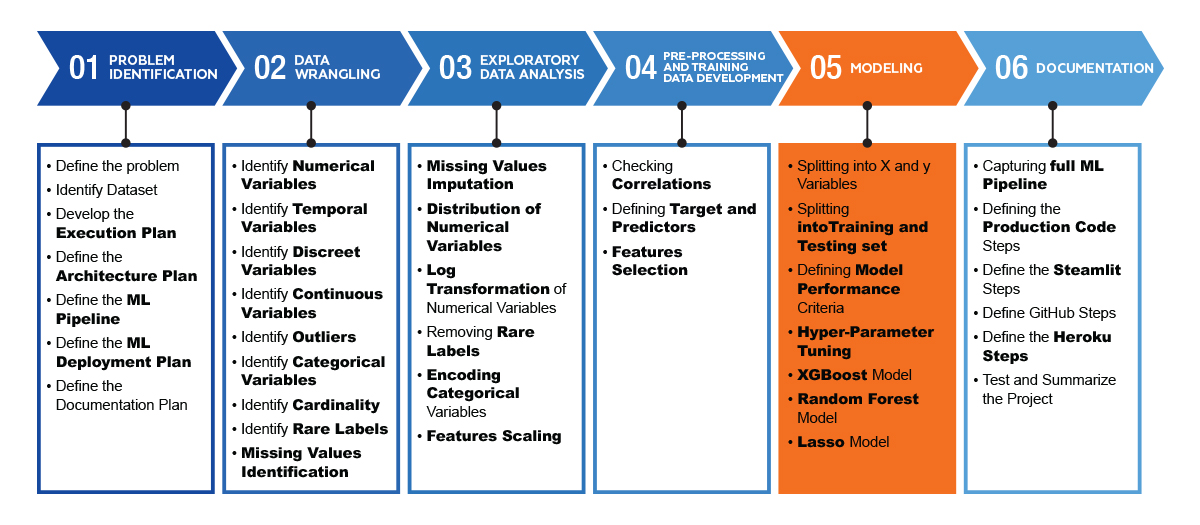

## Quick Access to various Jupyter Notebooks<a id='4.8_Jupyter_Notebooks'></a>

Based on the DSM methodology, a dedicated jupyter notebook was created to focus on one aspect at a time and you can refer these notebooks from the below links:

   1. For **Problem Identification Notebook** - [click here](https://github.com/jayguptacal/RetailAndMarketing/blob/main/HouseSalesPricePrediction/1_Problem_Identification_House_Prices.ipynb)
   2. For **Data Wrangling Notebook**, [click here](https://github.com/jayguptacal/RetailAndMarketing/blob/main/HouseSalesPricePrediction/2_Data_Wrangling_House_Prices.ipynb)
   3. For **Exploratory Data Analysis Notebook**, [click here](https://github.com/jayguptacal/RetailAndMarketing/blob/main/HouseSalesPricePrediction/3_EDA_House_Prices.ipynb)
   4. For **Pre-Processing and Training Data Development Notebook**, [click here](https://github.com/jayguptacal/RetailAndMarketing/blob/main/HouseSalesPricePrediction/4_Preprocessing_TrainingData_HousePrices.ipynb)
   5. For **Machine Learning Notebook**, [click here](https://github.com/jayguptacal/RetailAndMarketing/blob/main/HouseSalesPricePrediction/5_Machine_Learning_House_Prices.ipynb)
   6. For **Full ML Model for Production Purpose**, [click here](https://github.com/jayguptacal/RetailAndMarketing/blob/main/HouseSalesPricePrediction/6a_FullMLPipeline_ProductionPurpose.ipynb)